# Predict Pulsar Stars (under development)
The goal of this challenge is to classify stars between Pulsar and non-Pulsar.

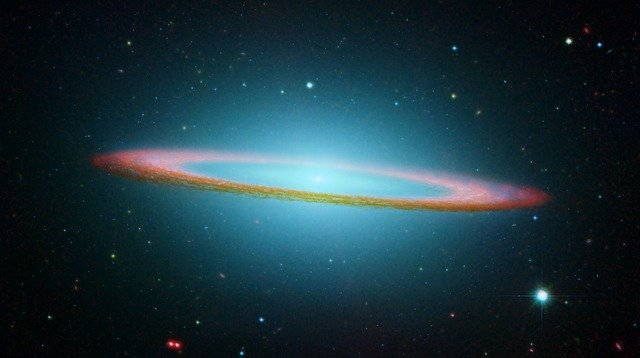

In [1]:
from IPython.display import Image
Image(filename='figures/galaxyWikiImagesPixabay.jpg')

Photo by [WikiImages](https://pixabay.com/pt/users/wikiimages-1897/) from [Pixabay](https://pixabay.com)

## Basic info
© Tiago Tamagusko (tamagusko@gmail.com)  
Version: [CHANGELOG.md](/CHANGELOG.md)  
Project Page: <a href="https://github.com/tamagusko/jest20201">https://github.com/tamagusko/jest20201</a>  
License: [LICENSE](/LICENSE)

## Study Structure
1. Problem definition; 
2. Data collection (provided by [1]);
3. Data preparation;
4. Algorithms;
5. Improvements;
6. Results.

## Project data structure:
    
    ├── predictPulsar.ipynb              # Python code
    ├── CHANGELOG.md                     # Project change log
    ├── LICENSE.md                       # License
    ├── README.md                        # Home
    ├── requirements.txt                 # Project requirements
    ├── data                             # Data (raw and processed)
    ├── reports                          # Outputs

## Future developments

- Test implementations with SVM, Kmeans, logistic regression, and NN;
- Study data balancing techniques.

## 1. Problem
Classify stars between Pulsar (1) and non-Pulsar (0).
### 1.1 Proposal
Test various Machine Learning (ML) algorithms to try to predict Pulsar stars. The dataset used is available at [1] and was taken from [2].
## 2. Data collection
The data was collected and prepared by Pavan Raj [2].
### 2.1 Dataset - [pulsar_stars.csv](https://raw.githubusercontent.com/spingegod/ProjetoTI_part1/master/ProjetoTI/pulsar_stars.csv) [1]

*According to [2], the existing data in the dataset are:*

**rows**: 16,259 spurious examples (RFI/noise), and 1,639 real pulsar examples. Total of 17,898 rows.  

**columns**: 9 features, namely:  
  1. Mean of the integrated profile.
  2. Standard deviation of the integrated profile.
  3. Excess kurtosis of the integrated profile.
  4. Skewness of the integrated profile.
  5. Mean of the DM-SNR curve.
  6. Standard deviation of the DM-SNR curve.
  7. Excess kurtosis of the DM-SNR curve.
  8. Skewness of the DM-SNR curve.
  9. Class (1=Pulsar, 0=non-Pulsar)

So, the features are columns 1 to 8, and the label is the column 9.

# 3. Data Preparation

In [2]:
# Import needed libraries
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.simplefilter(action='ignore')

TODAY = dt.datetime.now().strftime('%y%m%d')

## 3.1 Download dataset

In [3]:
# dataset developed by [2]
url = 'https://raw.githubusercontent.com/spingegod/ProjetoTI_part1/master/ProjetoTI/pulsar_stars.csv'


def getData(url):
    # only works with csv files
    df = pd.read_csv(url)
    return df


def saveData(df, folder='', name='temp'):
    # only works with csv files (add format parameter if necessary)
    # you can enter the entire path to the folder
    if folder == 'raw':
        folder = 'data/raw/'
    elif folder == 'processed':
        folder = 'data/processed/'
    elif folder == 'results':
        folder = 'results/'
    return df.to_csv(folder + str(TODAY) + '_' + name + '.csv')


data = getData(url)

# save raw data
saveData(data, 'raw', 'pulsar_stars.csv')

## 3.2 Quick Data visualization

In [4]:
# data
data.shape

(17898, 9)

In [5]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
data.isna().any()

 Mean of the integrated profile                  False
 Standard deviation of the integrated profile    False
 Excess kurtosis of the integrated profile       False
 Skewness of the integrated profile              False
 Mean of the DM-SNR curve                        False
 Standard deviation of the DM-SNR curve          False
 Excess kurtosis of the DM-SNR curve             False
 Skewness of the DM-SNR curve                    False
target_class                                     False
dtype: bool

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
Standard deviation of the integrated profile,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
Excess kurtosis of the integrated profile,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
Skewness of the integrated profile,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
Mean of the DM-SNR curve,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392140
Standard deviation of the DM-SNR curve,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
Excess kurtosis of the DM-SNR curve,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
Skewness of the DM-SNR curve,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309331,1191.000837
target_class,17898.0,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


In [8]:
# total of zeros (non-Pulsar) and ones (Pulsar)
negatives = data.loc[:, 'target_class'].isin([0]).sum()
positives = data.loc[:, 'target_class'].isin([1]).sum()

print('non-Pulsar: {} \nPulsar: {} \nPulsar(%): {:.2f}'.format(
    negatives, positives, positives/negatives*100))

non-Pulsar: 16259 
Pulsar: 1639 
Pulsar(%): 10.08


*Note 1: Apparently the data has already been cleared. There are no NAN fields in the sample.*  
*Note 2: Use stratify=target to try to minimize the problem of the few positive values.*  
*Note 3: I may have to create synthetic data (oversampling) or decrease the training data for the non-Pulsar class (undersampling).*

# 4. Algorithms
## 4.1 Random Forest (5 fold)

In [9]:
# split data into X and y
y = data.drop(data.columns[0:8], axis=1)
X = data.drop(['target_class'], axis=1)

In [10]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

KF = KFold(5, shuffle=True, random_state=0)
i = 1
sumPrecision = []

for rowsTrain, rowsVal in KF.split(X):
    print('Fold:', i)
    i += 1
    print('Train:', rowsTrain.shape[0])
    print('Validation:', rowsVal.shape[0])

    X_train, X_val = X.iloc[rowsTrain], X.iloc[rowsVal]
    y_train, y_val = y.iloc[rowsTrain], y.iloc[rowsVal]

    clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    clf.fit(X_train, y_train)

    p = clf.predict(X_val)

    # tp / (tp + fp), w/ tp = true positive and fp = false positive
    precision = precision_score(y_val, p)
    print('Precision score: {:.2f}\n'.format(precision))
    sumPrecision.append(precision)

Fold: 1
Train: 14318
Validation: 3580
Precision score: 0.94

Fold: 2
Train: 14318
Validation: 3580
Precision score: 0.92

Fold: 3
Train: 14318
Validation: 3580
Precision score: 0.96

Fold: 4
Train: 14319
Validation: 3579
Precision score: 0.92

Fold: 5
Train: 14319
Validation: 3579
Precision score: 0.92



## 4.2 Test

In [11]:
print('Mean precision score: {:.2f}\n'.format(np.mean(sumPrecision)))

Mean precision score: 0.93



## 4.3 Evaluation of features importances

In [12]:
featureImportance = pd.DataFrame({'feature': list(X_train.columns),
                                  'importance': clf.feature_importances_}).\
    sort_values('importance', ascending=False)

featureImportance

,feature,importance
2,Excess kurtosis of the integrated profile,0.405929
0,Mean of the integrated profile,0.193469
3,Skewness of the integrated profile,0.139499
5,Standard deviation of the DM-SNR curve,0.073396
4,Mean of the DM-SNR curve,0.061595
1,Standard deviation of the integrated profile,0.050019
6,Excess kurtosis of the DM-SNR curve,0.043078
7,Skewness of the DM-SNR curve,0.033015


*The columns 1, 4, 6, and 7 could be discarded, however, with a result of 0.93 there is no need.*

## 4.4 Save results

In [13]:
Pulsar_RF_5fold = pd.DataFrame(data=p, columns=['Pulsar'])
Pulsar_RF_5fold['ID'] = Pulsar_RF_5fold.index.values
Pulsar_RF_5fold.set_index('ID', inplace=True)

# save result as csv
saveData(Pulsar_RF_5fold, 'results', 'Pulsar_RF_5fold')

# 5. Improvements

Nothing at the moment =)

# 6. Results

With a mean precision score of 0.93 this result is apparently good, the random forest algorithm and cross validation with 5 folds was used.

The ideal is to test other algorithms in the future. 

*Note: In this dataset imbalanced with a lot of data, it would be interesting to try undersampling to test (I never had the opportunity to test this technique).*

# Citation
Tamagusko, T. (2020). Initiation Project JEST 2020/1. Part 1. Retrieved from https://github.com/tamagusko/jest20201  
## References <a id="ref"></a>
[1] Dataset to support the study. (2020, Jun 03). Retrieved from https://github.com/spingegod/ProjetoTI_part1  
[2] Raj, P. (2020). Predicting a Pulsar Star (2020, Jun 03). Retrieved from https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star